In [2]:
from sklearn.datasets import load_digits
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

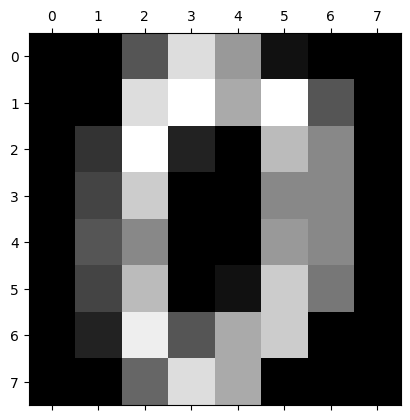

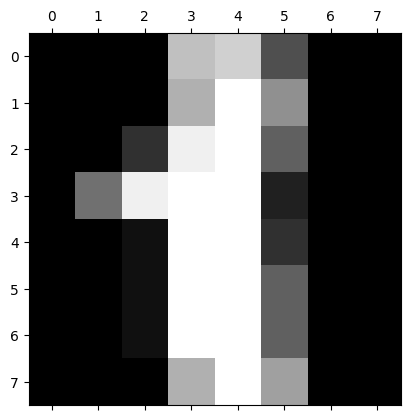

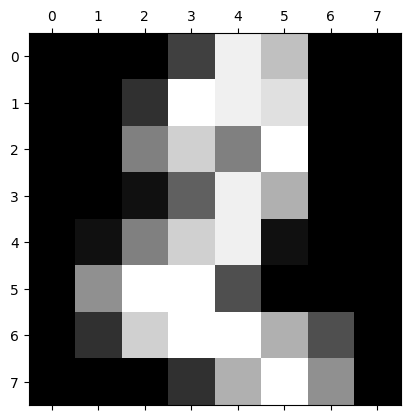

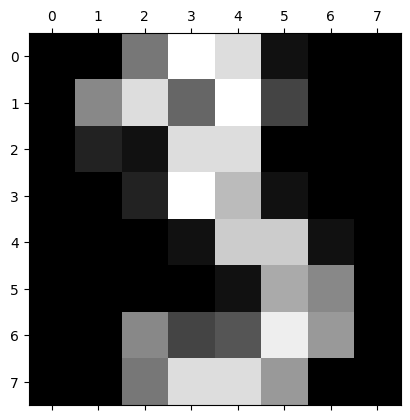

In [5]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
df = pd.DataFrame(digits.data)

In [12]:
df["target"]=digits.target
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_test,x_train,y_test,y_train=train_test_split(df.drop(["target"],axis="columns"),digits.target,train_size=0.2)

In [15]:
len(x_test)

359

In [16]:
len(x_train)

1438

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model =RandomForestClassifier()

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
model.score(x_test,y_test)

0.9860724233983287

In [22]:
y_predication=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predication)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

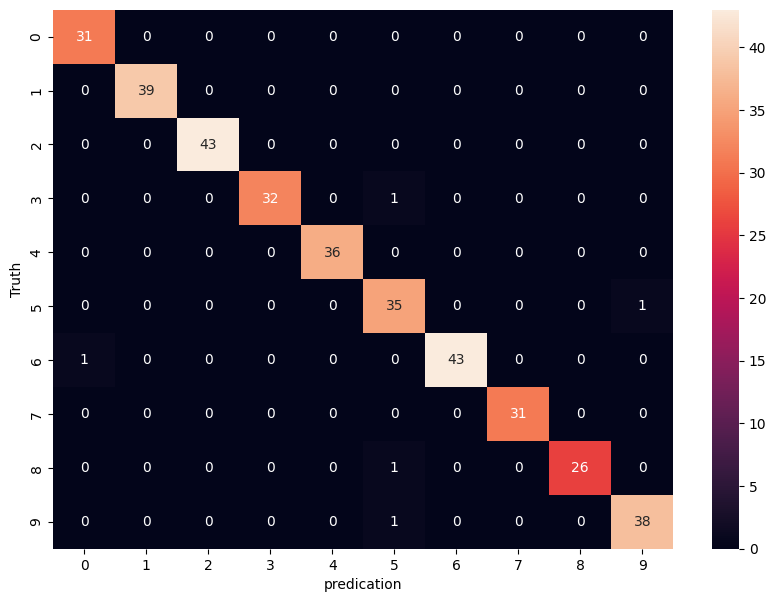

In [24]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predication")
plt.ylabel("Truth")